# Python Team Porject
### Group member: Boduo Lin, Qiaochu Ma, Meng Zhang, Jiaren Han, Wenyuan Pan

## 1. Data Preprocessing

In [1]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Concatenate two files

In [3]:
fuel1 = pd.read_csv('Fuel_Level_Part_1.csv')
fuel2 = pd.read_csv('Fuel_Level_Part_2.csv')
display(fuel1)
display(fuel2)

,Tank ID,Fuel Level,Time stamp
0,T 12,27161.0,1/1/2017 0:10
1,T 12,27017.0,1/1/2017 0:25
2,T 12,26934.0,1/1/2017 0:40
3,T12,NaN,1/1/2017 0:45
4,T 12,26786.0,1/1/2017 0:55
...,...,...,...
885146,T 31,33770.0,8/15/2019 22:52
885147,T 31,33770.0,8/15/2019 23:08
885148,T 31,33770.0,8/15/2019 23:22
885149,T 31,33770.0,8/15/2019 23:37


,Tank ID,Fuel_Level,Timestamp
0,T 32,22327,1/1/2017 0:05
1,T 20,25215,1/1/2017 0:07
2,T 10,25700,1/1/2017 0:09
3,T 11,25685,1/1/2017 0:10
4,T 14,27138,1/1/2017 0:10
...,...,...,...
974504,T 32,27619,8/15/2019 23:53
974505,T 22,31548,8/15/2019 23:57
974506,T 16,53492,8/15/2019 23:57
974507,T 18,27081,8/15/2019 23:57


In [6]:
fuel2.rename(columns= {'Fuel_Level' : 'Fuel Level'},inplace= True)
fuel1.rename(columns = {'Time stamp' : 'Timestamp'},inplace= True)

In [8]:
fuel_level = pd.concat([fuel1,fuel2])
display(fuel_level)

,Tank ID,Fuel Level,Timestamp
0,T 12,27161.0,1/1/2017 0:10
1,T 12,27017.0,1/1/2017 0:25
2,T 12,26934.0,1/1/2017 0:40
3,T12,NaN,1/1/2017 0:45
4,T 12,26786.0,1/1/2017 0:55
...,...,...,...
974504,T 32,27619.0,8/15/2019 23:53
974505,T 22,31548.0,8/15/2019 23:57
974506,T 16,53492.0,8/15/2019 23:57
974507,T 18,27081.0,8/15/2019 23:57


#### Merge three datasets

In [11]:
tanks = pd.read_csv('Tanks.csv')
locations = pd.read_csv('Locations.csv')
invoices = pd.read_csv ('invoices.csv')

In [13]:
merge1= pd.merge(tanks, locations, left_on="Tank Location", right_on="Gas Station Location", how="inner")
gas_station = pd.merge(merge1, invoices, left_on="Gas Station Location", right_on="Invoice Gas Station Location", how="inner")
display(gas_station.head())
# We named the dataset that includes all three data as 'gas_station'

,Tank ID,Tank Location,Tank Number,Tank Type,Tank Capacity,Gas Station Location,Gas Station Name,Gas Station Address,Gas Station Latitude,Gas Station Longitude,Invoice Date,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Fuel Type
0,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/2/2017,10000.0,1,7570.82000,6609.600,G
1,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/2/2017,10001.0,1,12491.85300,9338.736,D
2,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/2/2017,10002.0,1,NaN,NaN,NaN
3,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/3/2017,10006.0,1,5670.54418,4239.216,D
4,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/3/2017,10007.0,1,7627.60115,6659.184,G


#### Data cleaning

<Axes: >

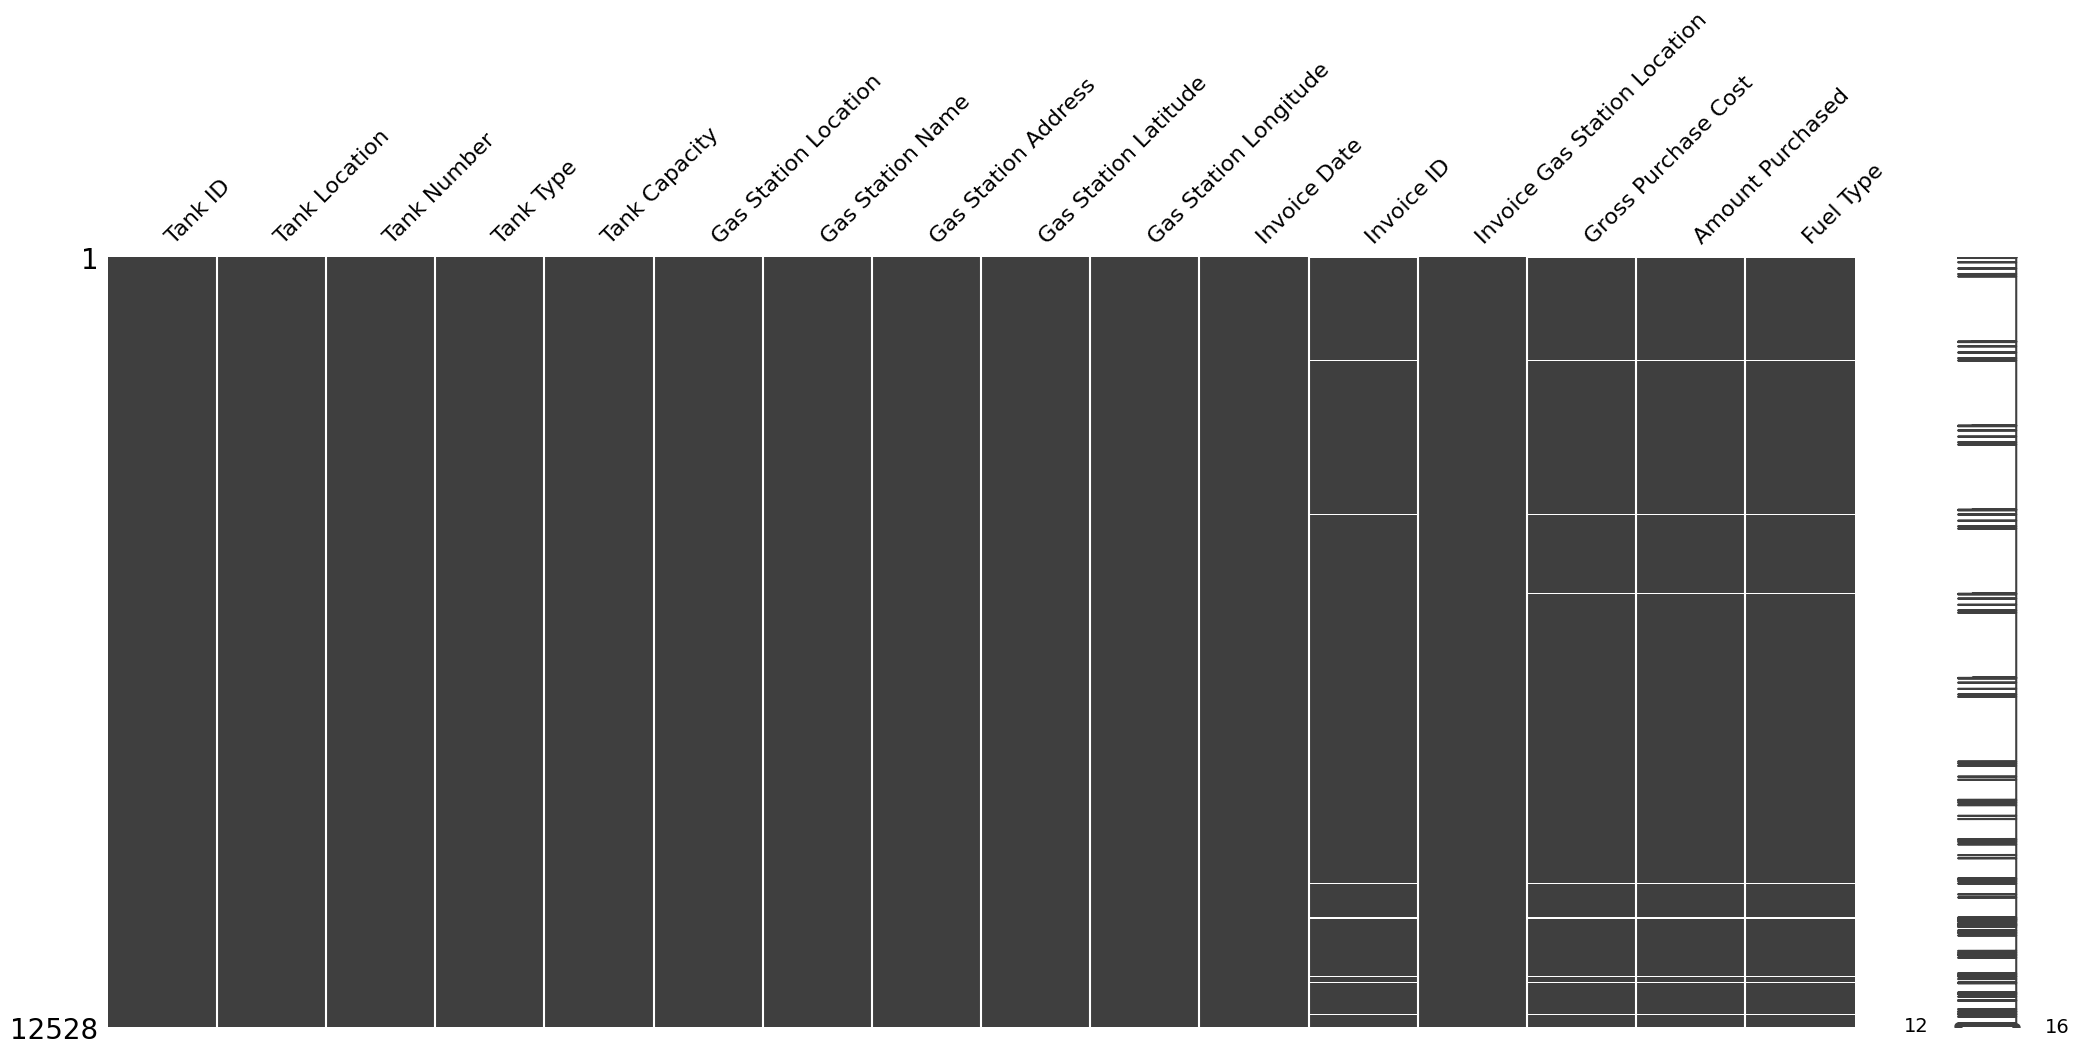

In [16]:
# Data cleaning for gas_station
msno.matrix(gas_station)

In [17]:
gas_station.isnull().sum()

Tank ID                           0
Tank Location                     0
Tank Number                       0
Tank Type                         0
Tank Capacity                     0
Gas Station Location              0
Gas Station Name                  0
Gas Station Address               0
Gas Station Latitude              0
Gas Station Longitude             0
Invoice Date                      0
Invoice ID                      110
Invoice Gas Station Location      0
Gross Purchase Cost             116
Amount Purchased                116
Fuel Type                       116
dtype: int64

In [18]:
gas_station = gas_station.dropna()
gas_station.head()
# we've dropped 116 rows with missing data, now they all have full data sources.

,Tank ID,Tank Location,Tank Number,Tank Type,Tank Capacity,Gas Station Location,Gas Station Name,Gas Station Address,Gas Station Latitude,Gas Station Longitude,Invoice Date,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Fuel Type
0,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/2/2017,10000.0,1,7570.82000,6609.600,G
1,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/2/2017,10001.0,1,12491.85300,9338.736,D
3,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/3/2017,10006.0,1,5670.54418,4239.216,D
4,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/3/2017,10007.0,1,7627.60115,6659.184,G
5,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/3/2017,10008.0,1,32175.98500,26704.960,G


#### data cleaning for fuel_level

<Axes: >

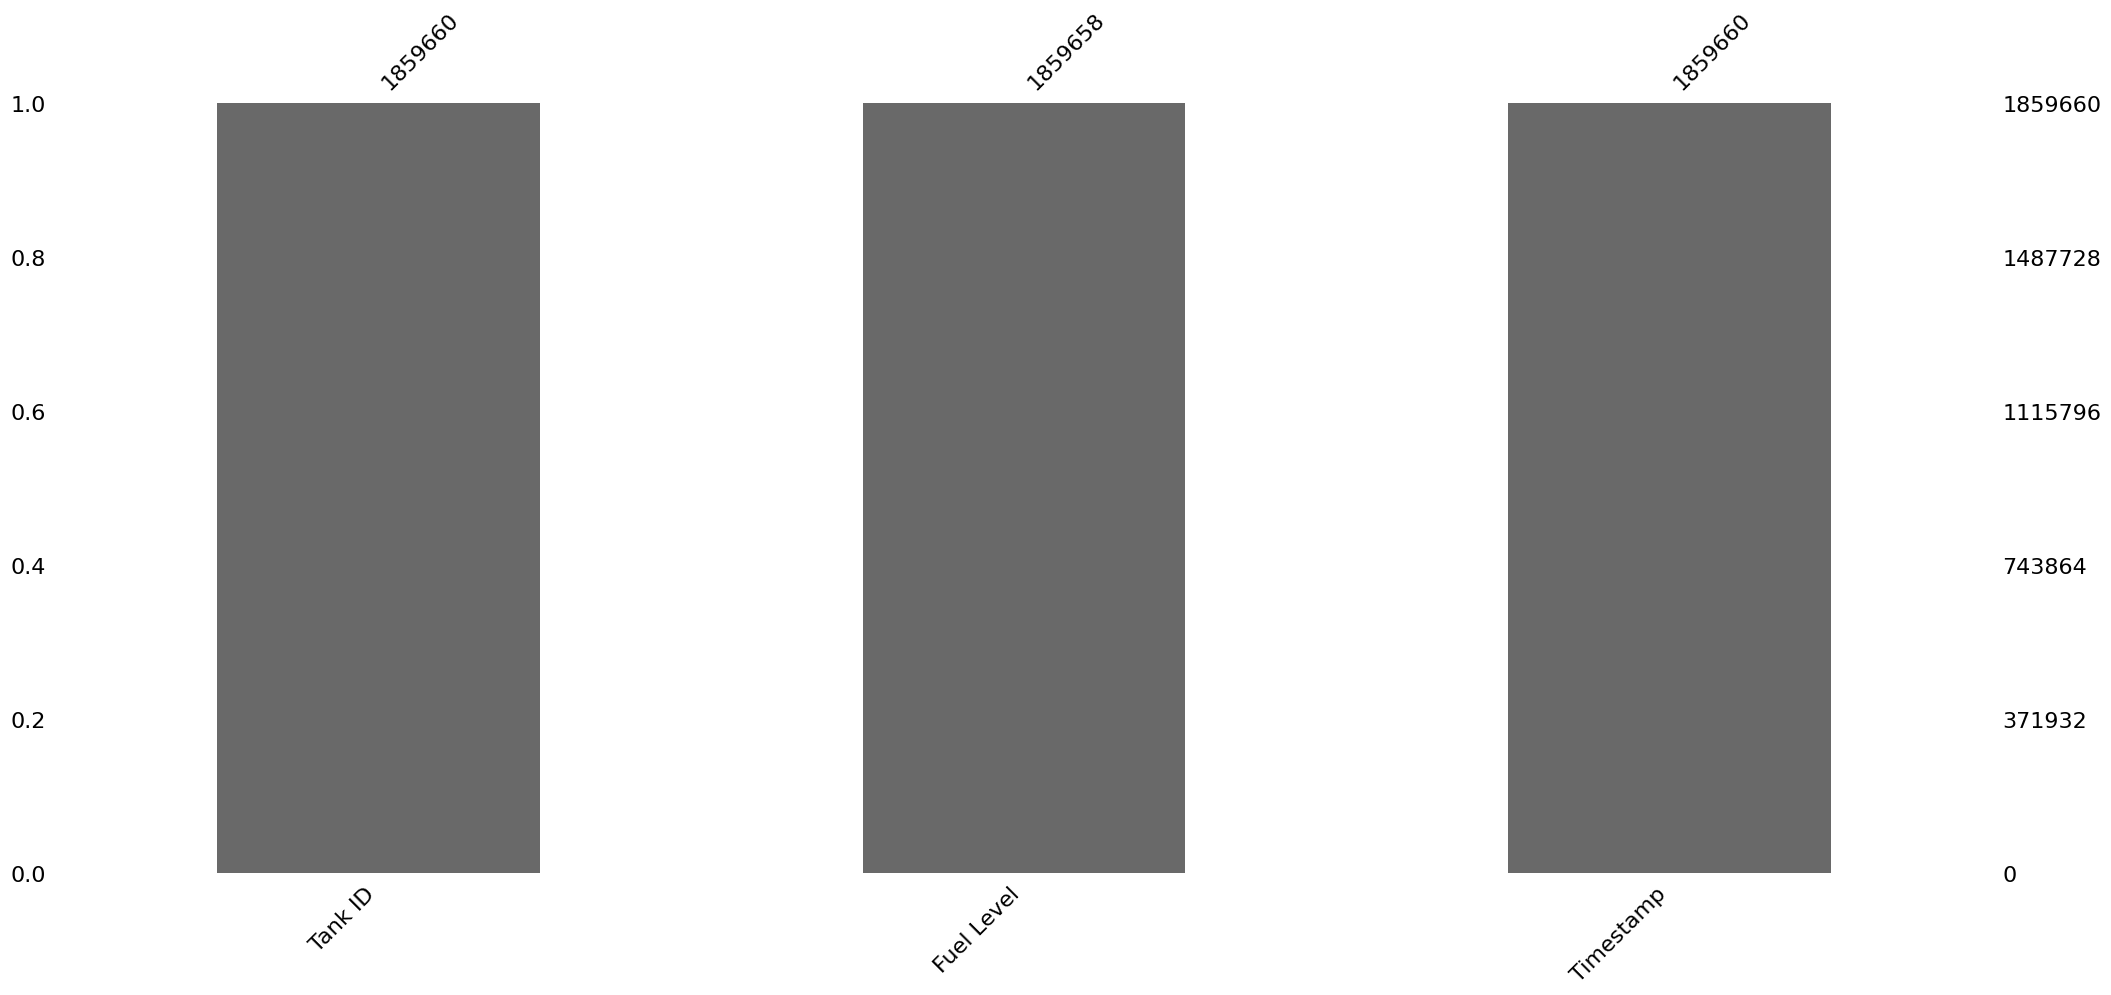

In [20]:
msno.bar(fuel_level)

In [21]:
fuel_level[fuel_level.isnull().any(axis=1)]

,Tank ID,Fuel Level,Timestamp
3,T12,NaN,1/1/2017 0:45
111,T12,NaN,1/2/2017 3:35


In [22]:
fuel_level = fuel_level.dropna()
display(fuel_level)
# we've dropped 2 rows with missing data, now they all have full data sources.

,Tank ID,Fuel Level,Timestamp
0,T 12,27161.0,1/1/2017 0:10
1,T 12,27017.0,1/1/2017 0:25
2,T 12,26934.0,1/1/2017 0:40
4,T 12,26786.0,1/1/2017 0:55
5,T 12,26748.0,1/1/2017 1:10
...,...,...,...
974504,T 32,27619.0,8/15/2019 23:53
974505,T 22,31548.0,8/15/2019 23:57
974506,T 16,53492.0,8/15/2019 23:57
974507,T 18,27081.0,8/15/2019 23:57


In [23]:
# checking whether fuel_level has duplicated data
duplicated_ID_timestamp = fuel_level[fuel_level.duplicated(subset= ['Tank ID','Timestamp'], keep= False)]
duplicated_ID_timestamp
# there are 237 rows of data that are duplicated, we need to clean them as well.

,Tank ID,Fuel Level,Timestamp
29786,T 12,20945.0,11/8/2017 11:44
29787,T 12,21347.0,11/8/2017 11:44
29788,T 12,20559.0,11/8/2017 11:59
29789,T 12,21123.0,11/8/2017 11:59
59596,T 12,24159.0,10/30/2018 23:14
...,...,...,...
804768,T 10,13700.0,3/15/2019 3:00
905504,T 18,35913.0,6/14/2019 15:13
905505,T 18,35913.0,6/14/2019 15:13
969086,T 16,62585.0,8/9/2019 15:28


In [24]:
# clean duplicated data by keeping their first existing data
fuel_level = fuel_level.drop_duplicates(subset= ['Tank ID','Timestamp'], keep= 'first').reset_index(drop= True)
display(fuel_level)
# Now, this is the fuel_level data with no missing data and duplicated data.

,Tank ID,Fuel Level,Timestamp
0,T 12,27161.0,1/1/2017 0:10
1,T 12,27017.0,1/1/2017 0:25
2,T 12,26934.0,1/1/2017 0:40
3,T 12,26786.0,1/1/2017 0:55
4,T 12,26748.0,1/1/2017 1:10
...,...,...,...
1859534,T 32,27619.0,8/15/2019 23:53
1859535,T 22,31548.0,8/15/2019 23:57
1859536,T 16,53492.0,8/15/2019 23:57
1859537,T 18,27081.0,8/15/2019 23:57


### Visualize Fuel Levels

In [29]:
# change datatype of timestamp to Datetime
fuel_level.Timestamp = pd.to_datetime(fuel_level.Timestamp)
display(fuel_level.dtypes)

Tank ID               object
Fuel Level           float64
Timestamp     datetime64[ns]
dtype: object

In [32]:
# visualize each tanks' fuel level
def visual_tank(ID):
    plt.figure(figsize= (20,4))
    plt.title(f' Fuel Level of {ID} by time')
    return sns.lineplot(data = fuel_level[fuel_level['Tank ID'] == ID],
               x = 'Timestamp',
               y = 'Fuel Level');

In [34]:
# Check unique tanks
fuel_level['Tank ID'].unique()

array(['T 12', 'T 13', 'T 15', 'T 17', 'T 19', 'T 21', 'T 23', 'T 24',
       'T 28', 'T 30', 'T 31', 'T 32', 'T 20', 'T 10', 'T 11', 'T 14',
       'T 25', 'T 16', 'T 27', 'T 26', 'T 22', 'T 18', 'T 29'],
      dtype=object)

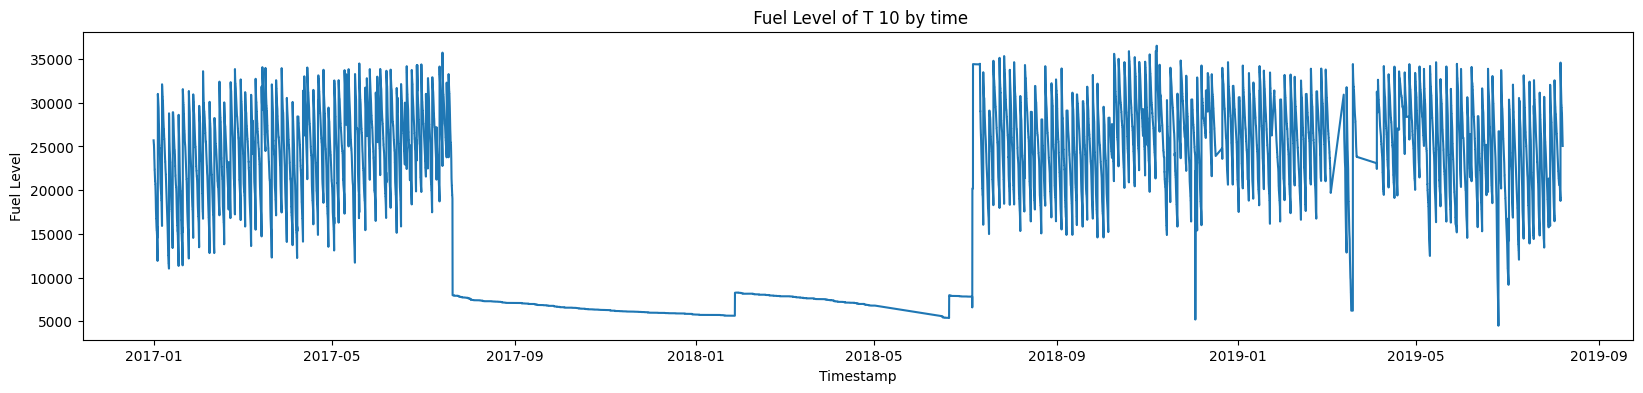

In [35]:
visual_tank('T 10');

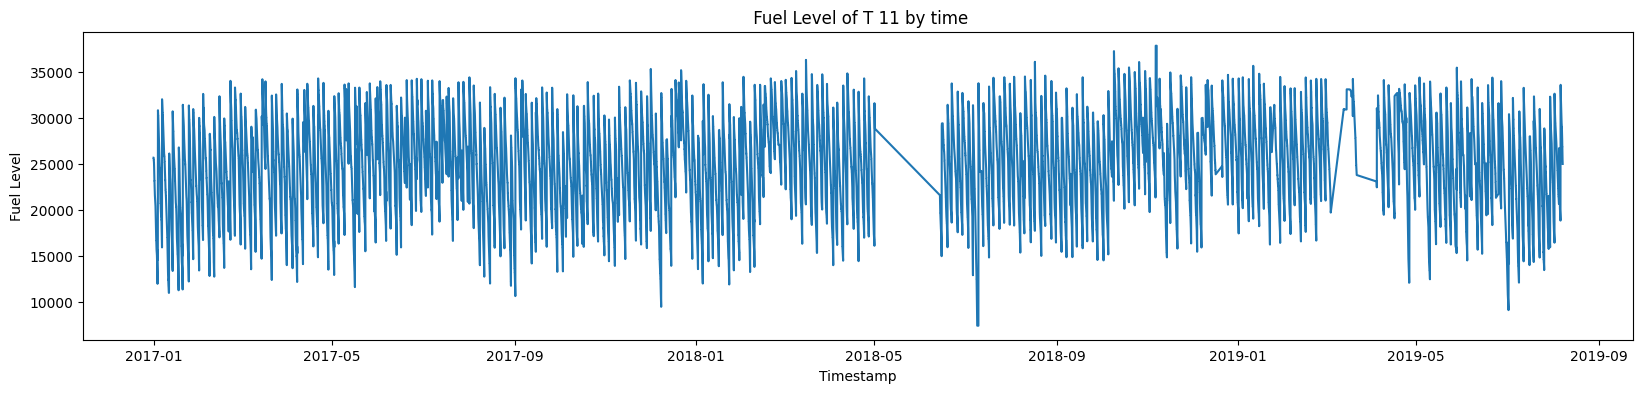

In [36]:
visual_tank('T 11');

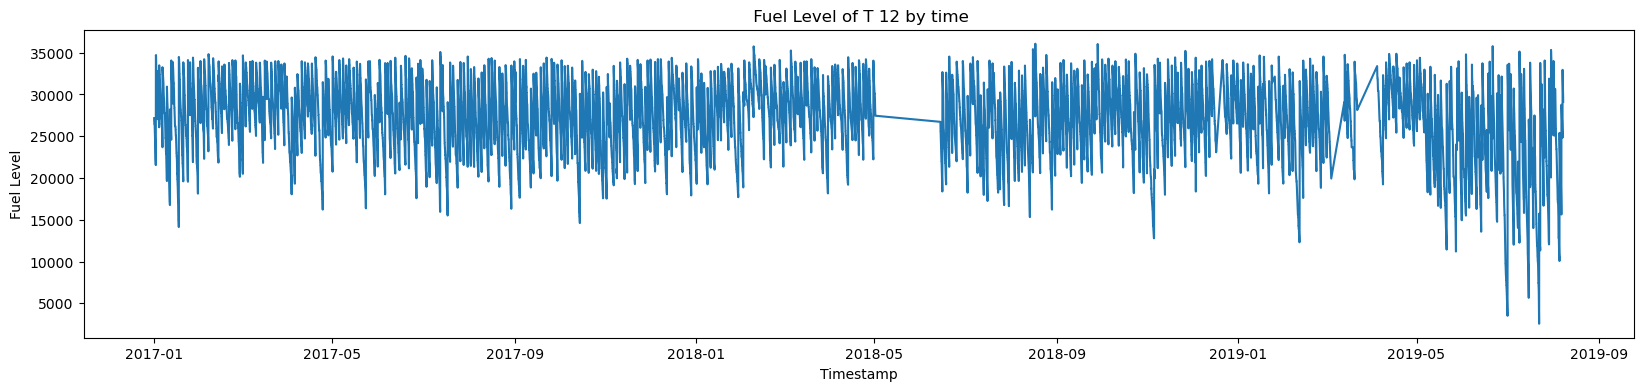

In [31]:
visual_tank('T 12');

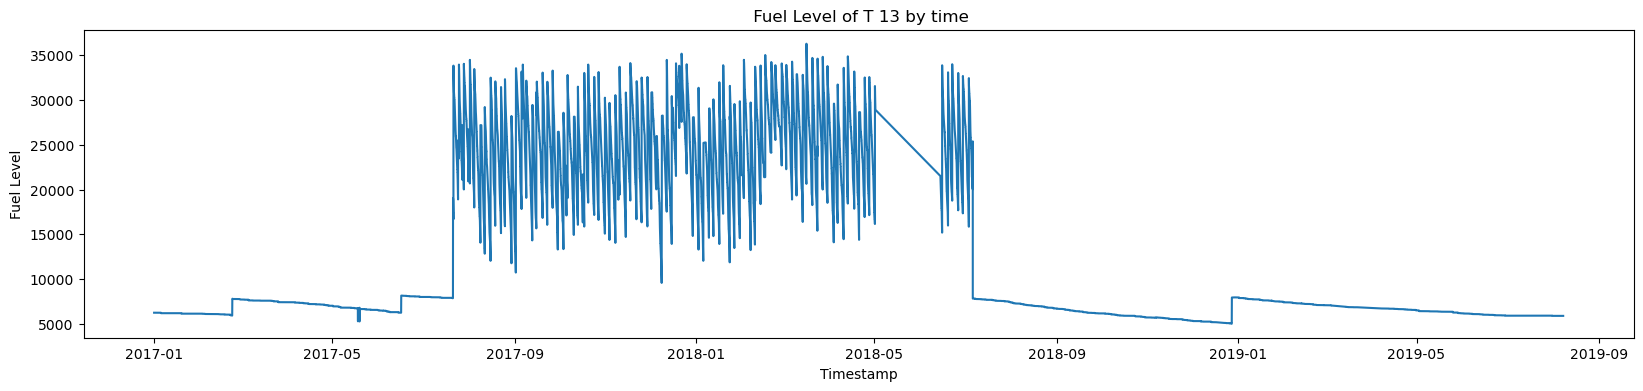

In [32]:
visual_tank('T 13');

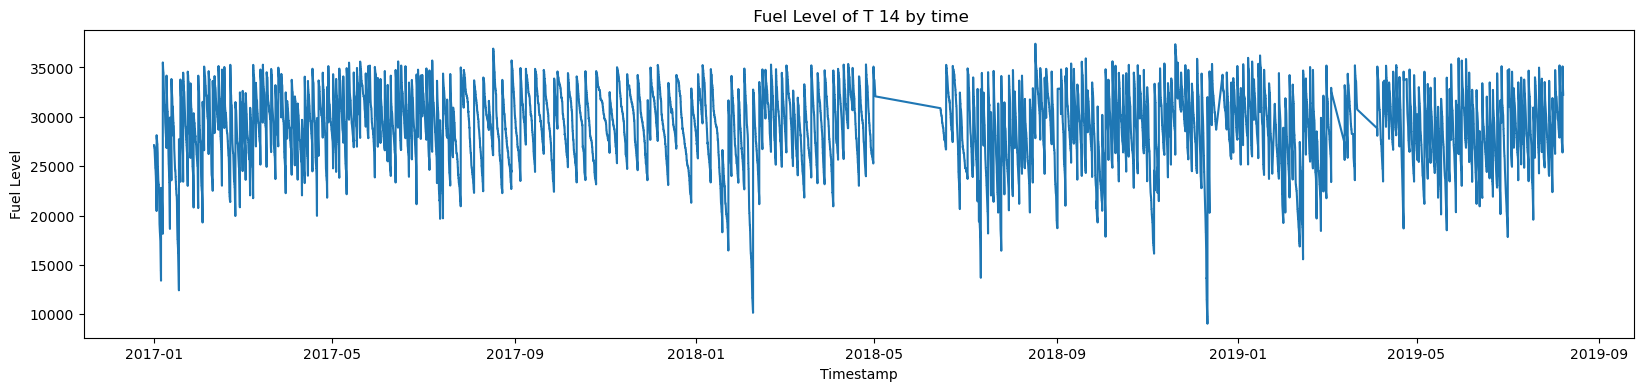

In [33]:
visual_tank('T 14');

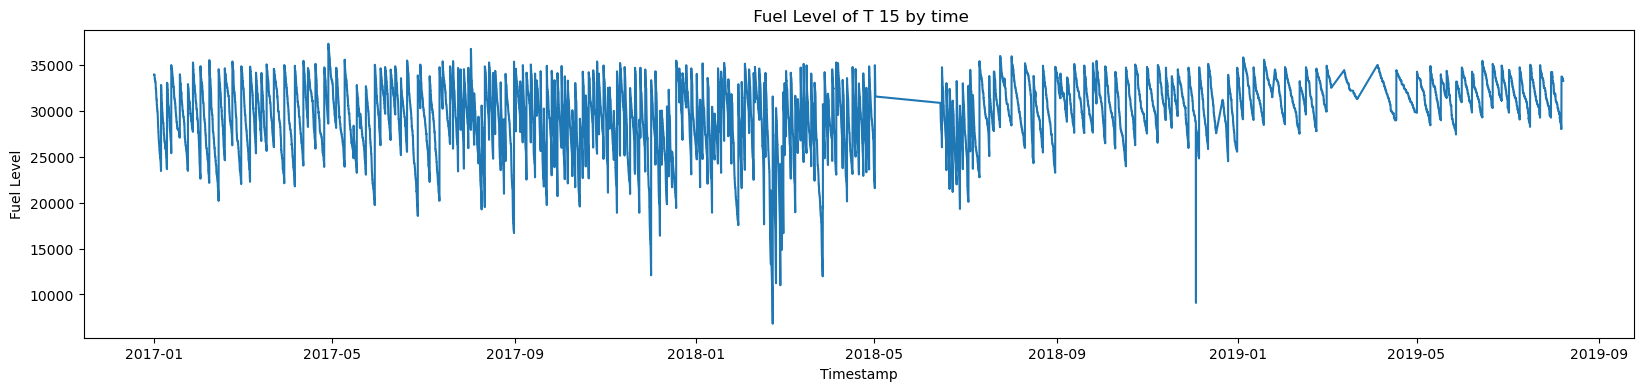

In [34]:
visual_tank('T 15');

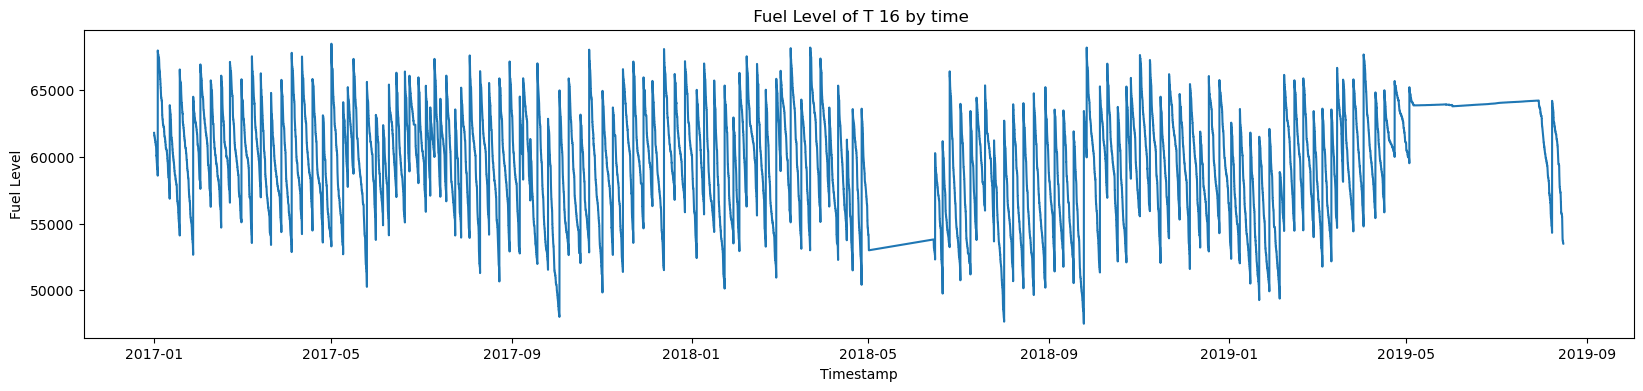

In [35]:
visual_tank('T 16');

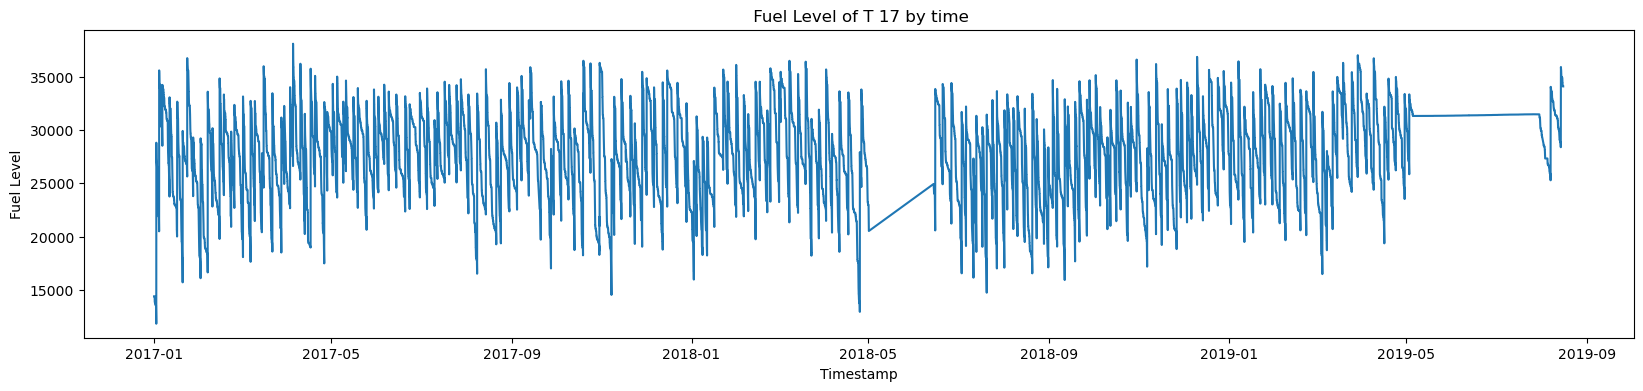

In [36]:
visual_tank('T 17');

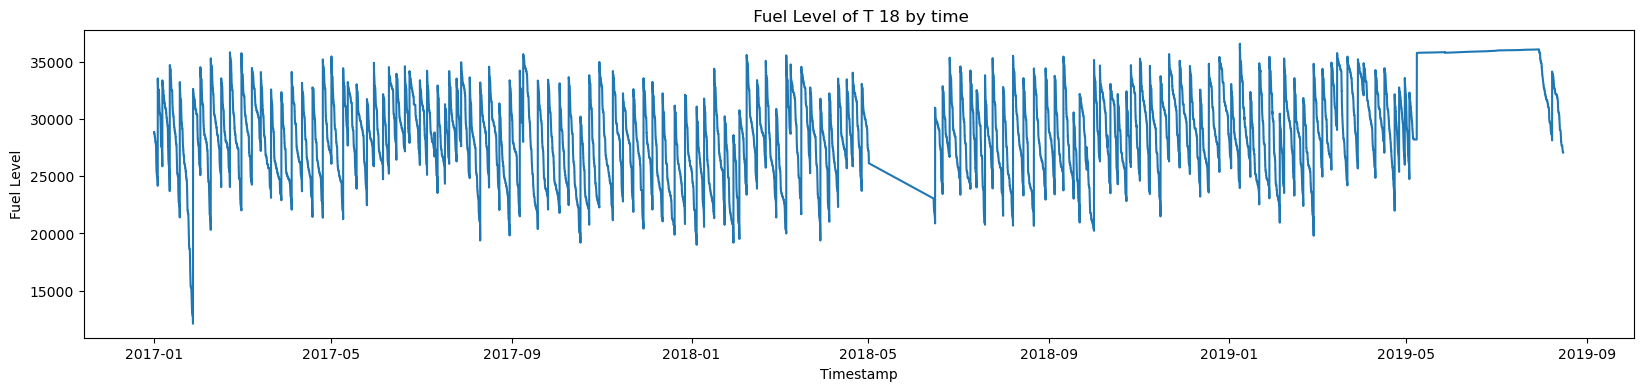

In [37]:
visual_tank('T 18');

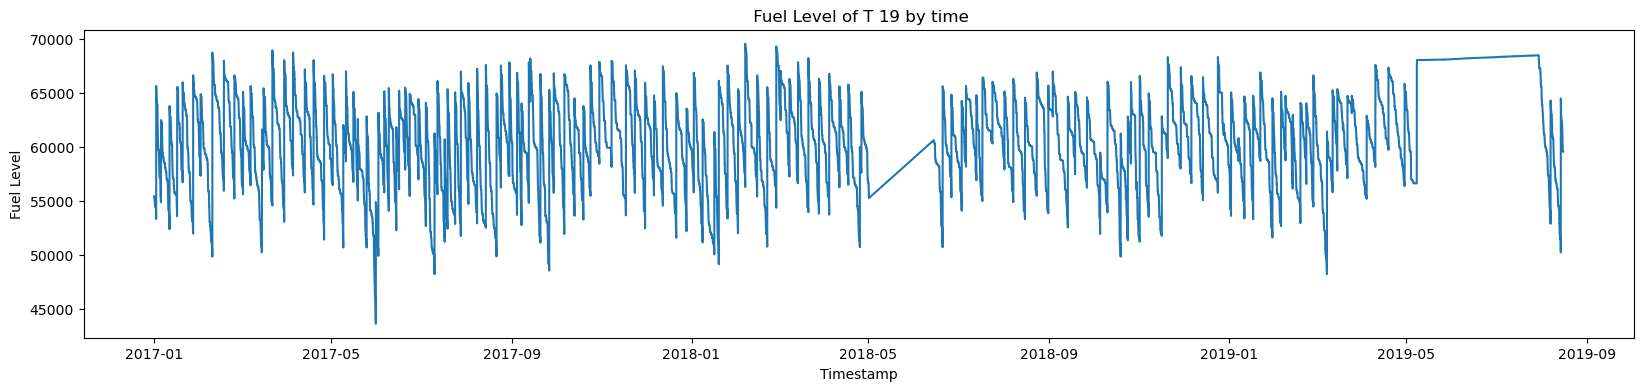

In [38]:
visual_tank('T 19');

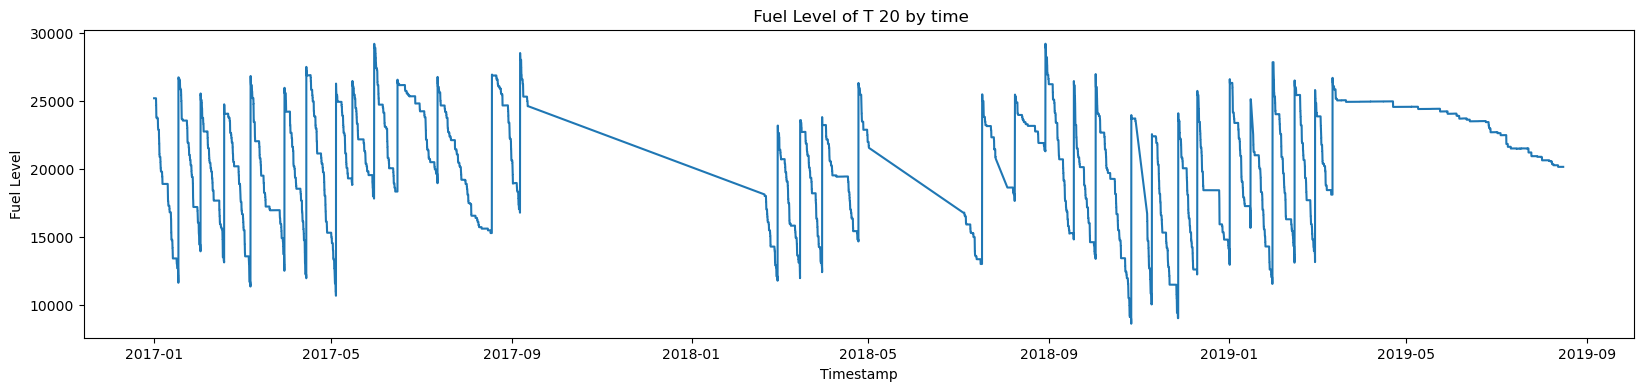

In [39]:
visual_tank('T 20');

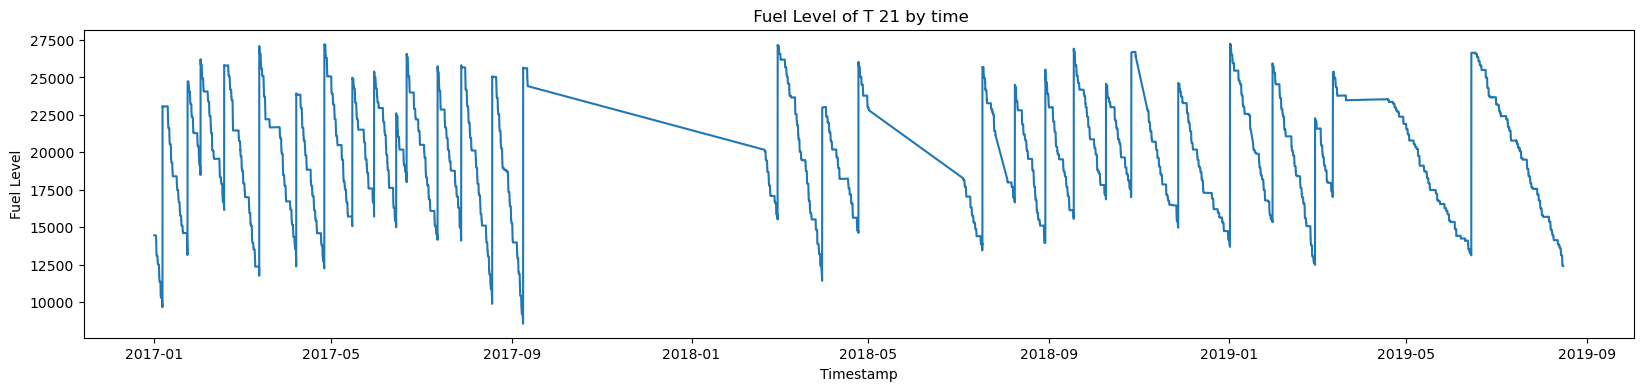

In [40]:
visual_tank('T 21');

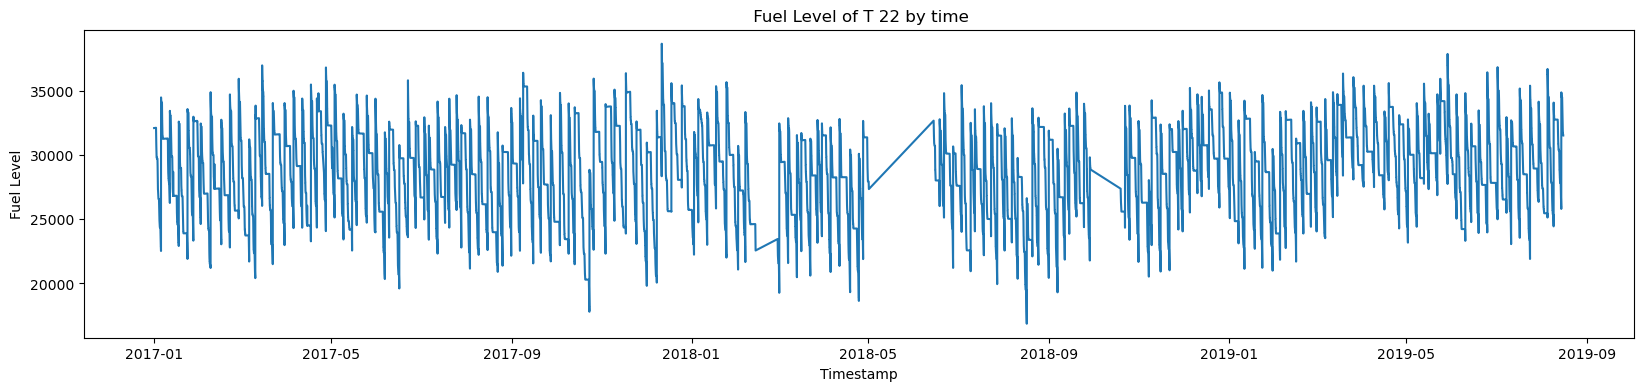

In [41]:
visual_tank('T 22');

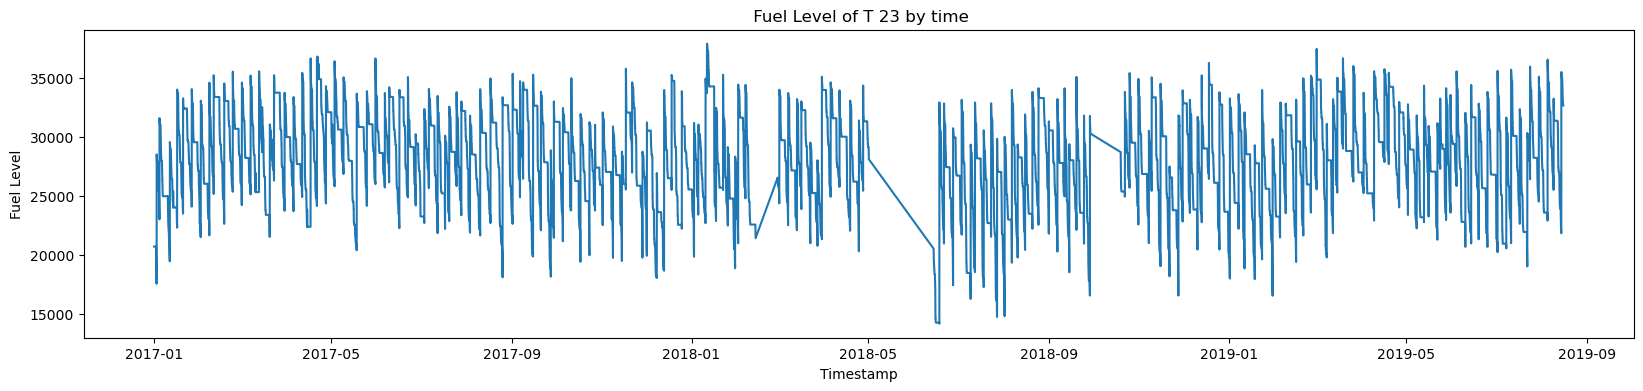

In [42]:
visual_tank('T 23');

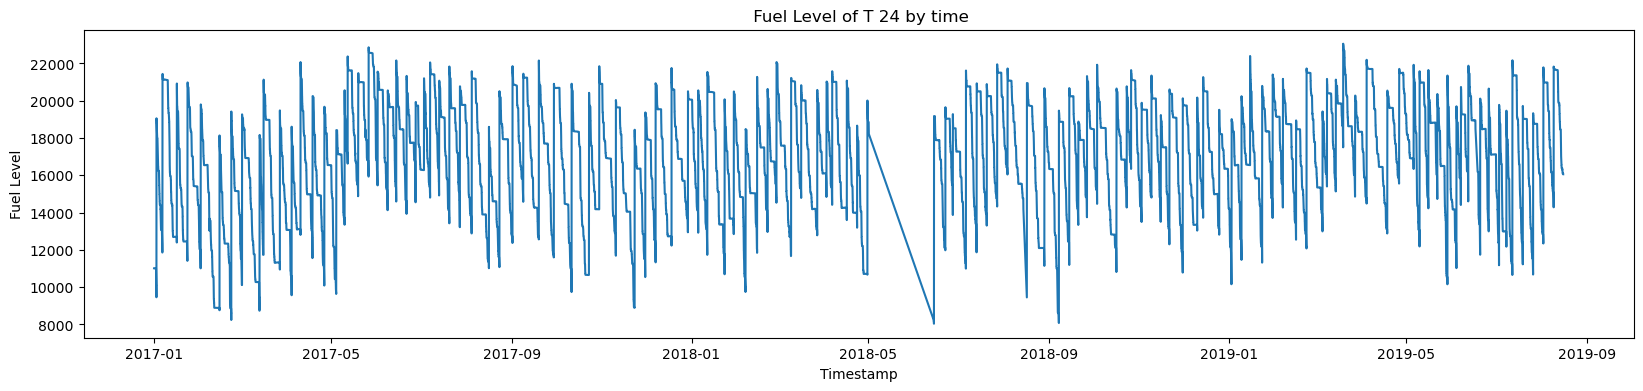

In [43]:
visual_tank('T 24');

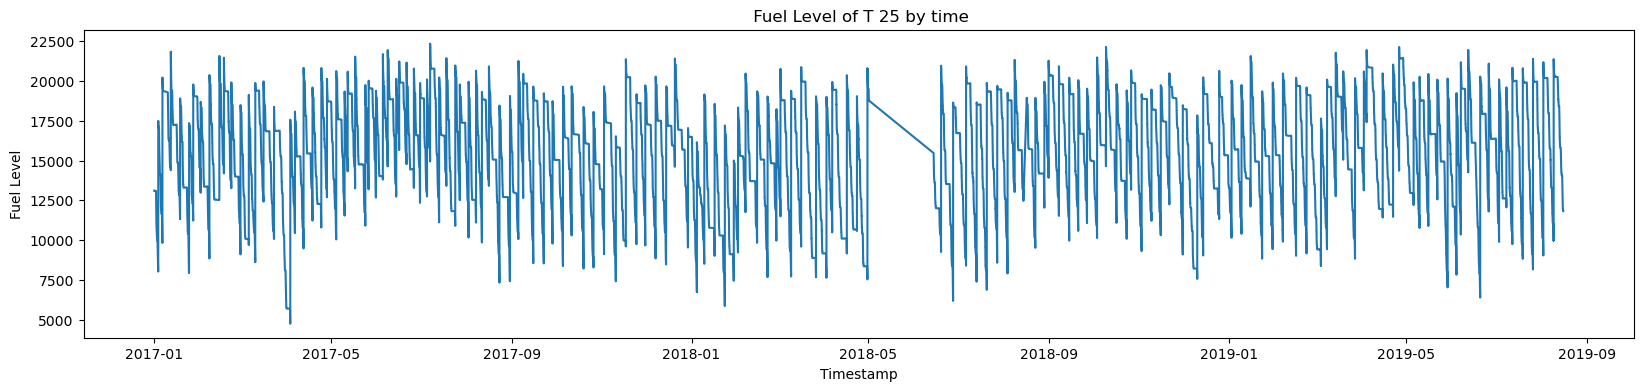

In [44]:
visual_tank('T 25');

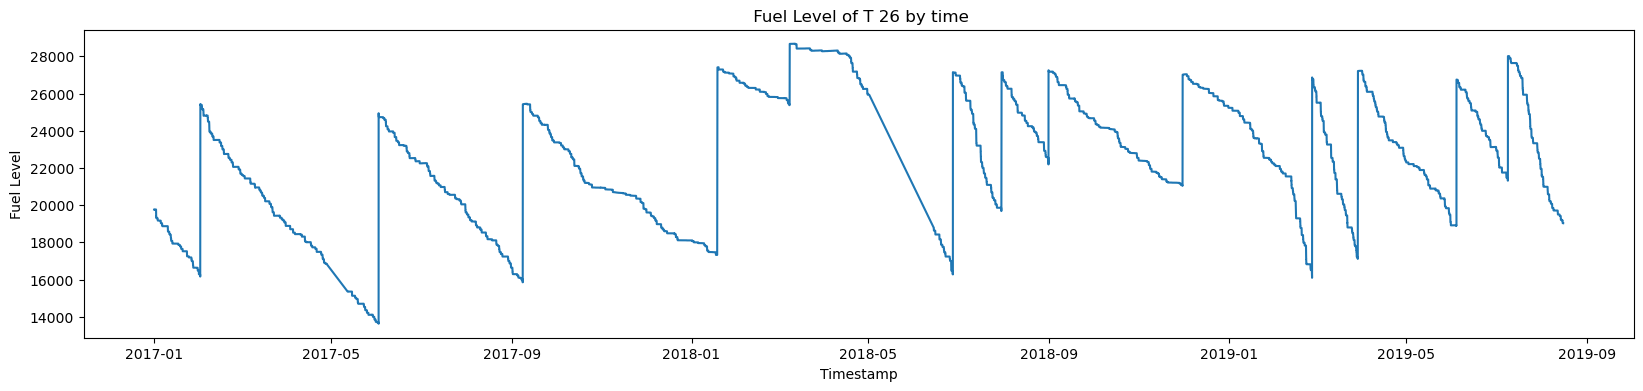

In [45]:
visual_tank('T 26');

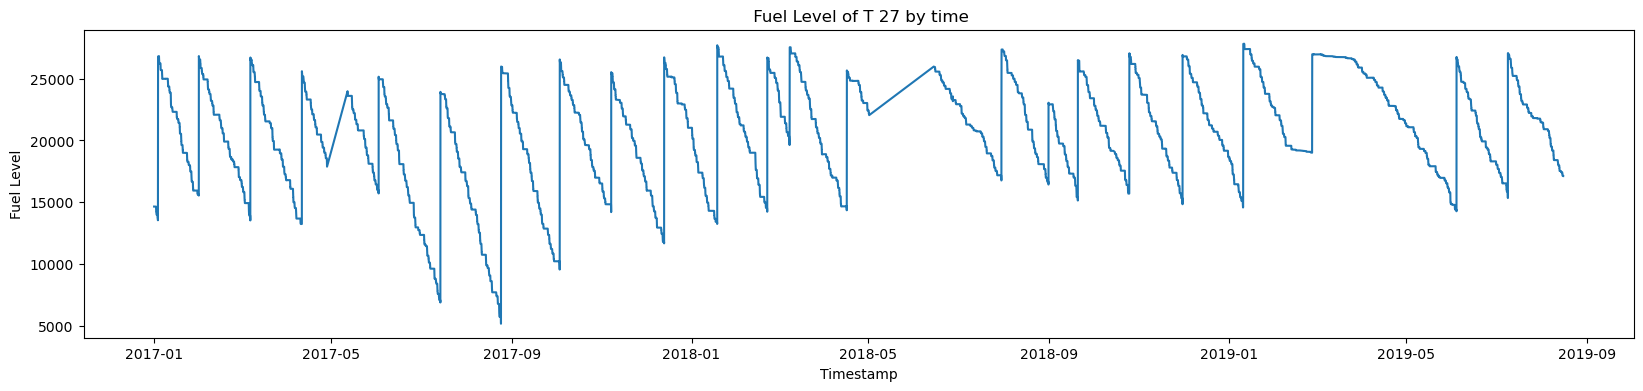

In [46]:
visual_tank('T 27');

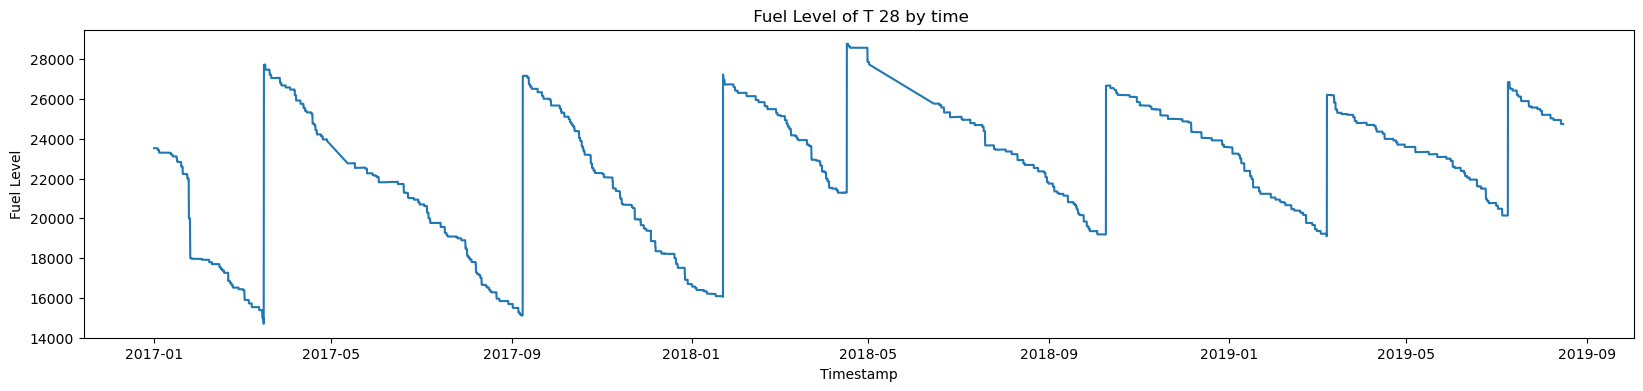

In [47]:
visual_tank('T 28');

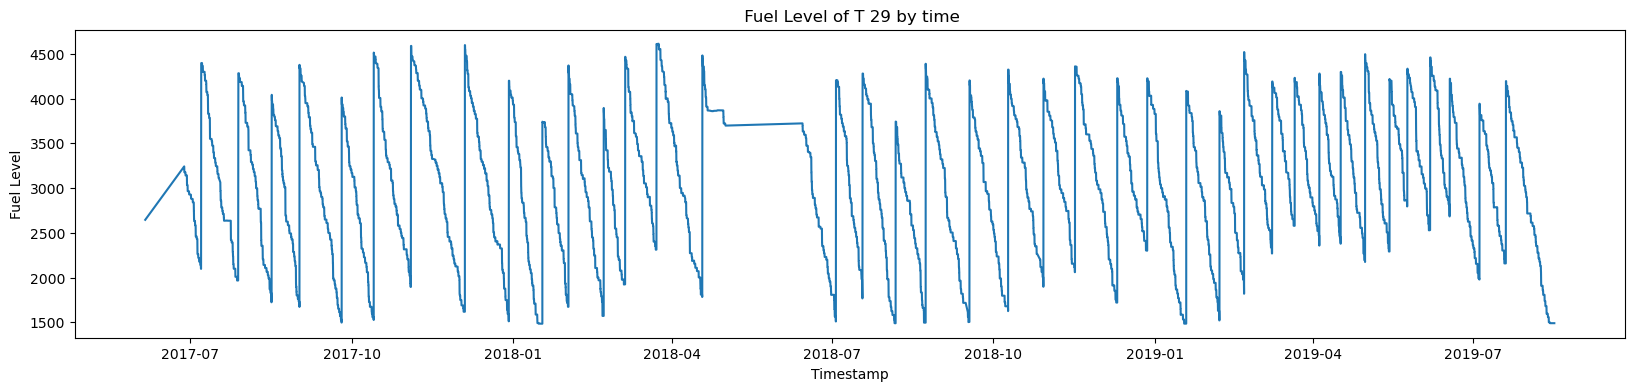

In [48]:
visual_tank('T 29');

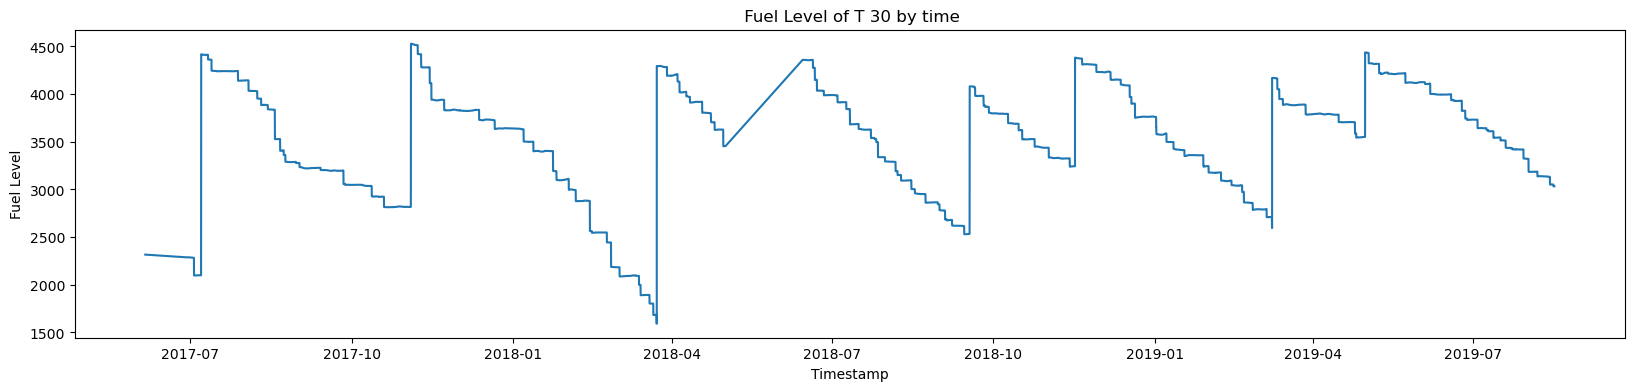

In [49]:
visual_tank('T 30');

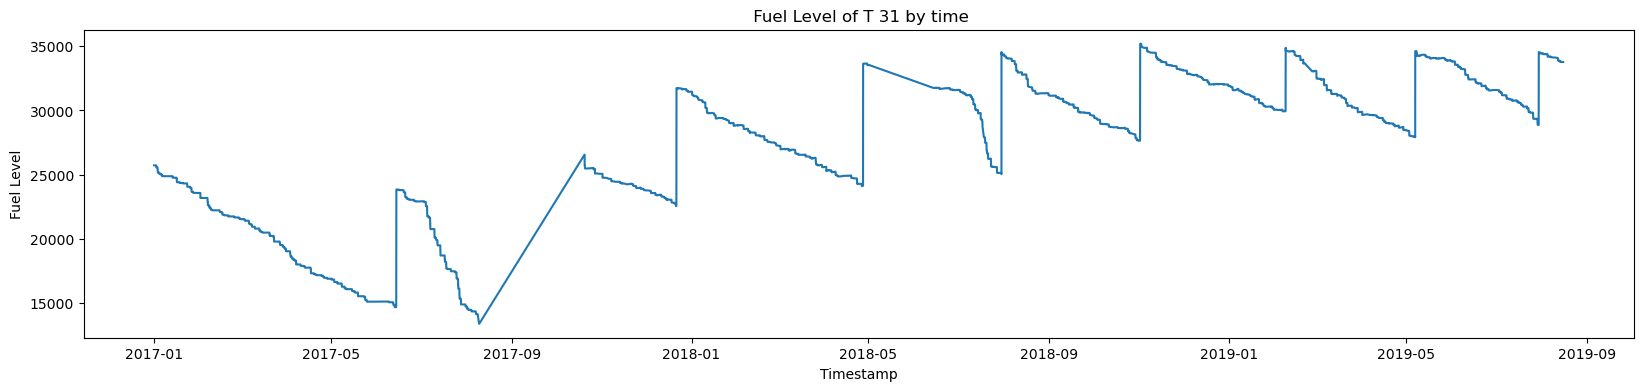

In [50]:
visual_tank('T 31');

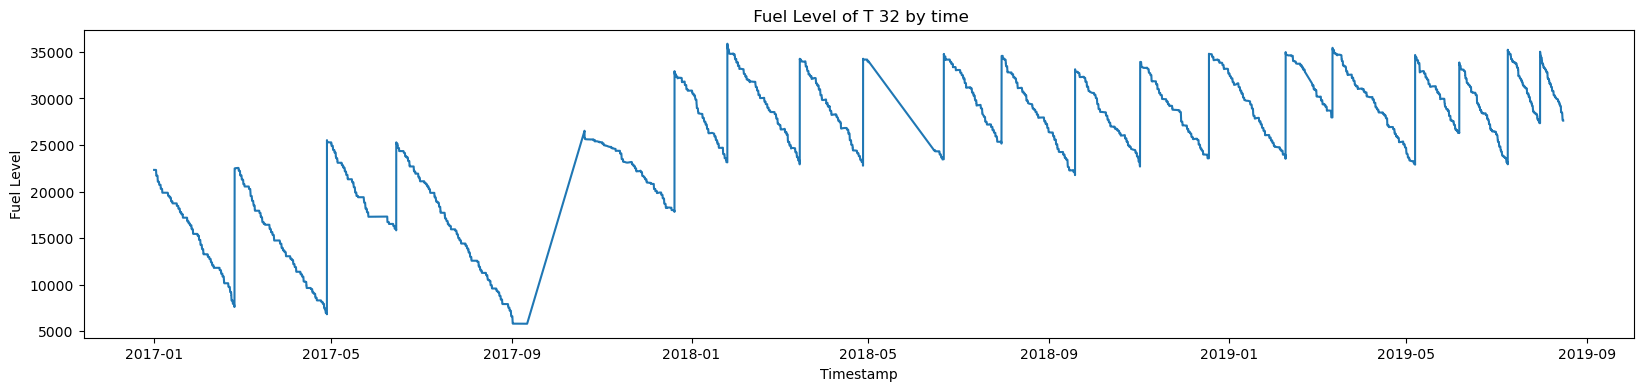

In [51]:
visual_tank('T 32');

In [52]:
# find locations for each tank
tank_location = gas_station[['Tank ID', 'Gas Station Location']].drop_duplicates()
tank_location

,Tank ID,Gas Station Location
0,T 10,1
1368,T 11,1
2736,T 12,1
4104,T 13,1
5472,T 14,1
6840,T 15,1
8208,T 16,2
8846,T 17,2
9484,T 18,2
10122,T 19,2


####  Identify stations with effective inventory management practices and those at risk of stockouts.
##### 1. We think Gas Station 1 has effective inventory management. It consists of tank 10, tank 11, tank 12, tank 13, tank 14, and tank 15. This is because the results of the line plot show that it uses the Smaller and More Frequent Deliveries, which maintains a smooth inventory level most of the time through regular and timely replenishment of inventory.
##### 2. We believe that the inventory management at Filling Station 2 is effective. It consists of Tank 16, Tank 17, Tank 18, and Tank 19 because, as the results of the line graph show, it achieves an even replenishment frequency that ensures a stable volume of fuel the vast majority of the time, with no apparent inventory risk.
##### 3. We believe that Gas Station 6 is at risk of running out of fuel. It consists of tank 26, tank 27, and tank 28, because the replenishment program is sparse and irregular, resulting in fuel levels often approaching an extremely low level and a potential shortage for an extended period of time.
##### 4. We consider Gas Station 7 to be at risk of stockouts, which includes tank 29 and tank 30. In particular, tank 29 is likely to be at risk of running out of stock. This is because the lineplot results show that the replenishment frequency is high but the inventory level of each purchase is low, resulting in an extremely low inventory level before the next replenishment, which is typical of a high-risk stockout.

### Quantify Current Performance

In [44]:
#Delete the rows in the invoices where the invoice ID is missing
invoices_data = invoices.dropna(subset=['Invoice ID'])

In [46]:
invoices_data

,Invoice Date,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Fuel Type
0,1/2/2017,10000.0,1,7570.82000,6609.600,G
1,1/2/2017,10001.0,1,12491.85300,9338.736,D
2,1/2/2017,10002.0,1,NaN,NaN,NaN
3,1/2/2017,10002.0,2,17034.34500,13377.824,D
5,1/2/2017,10003.0,2,12616.77153,9432.112,D
...,...,...,...,...,...,...
2868,8/14/2019,12826.0,2,14418.62669,8182.960,D
2869,8/14/2019,12827.0,2,7570.82000,4296.640,D
2870,8/14/2019,12828.0,4,8706.44300,6352.416,G
2871,8/14/2019,12829.0,4,13252.72041,7521.264,D


In [48]:
#Delete the rows in the invoices where the gross purchase cost is missing
invoices_data = invoices_data.dropna(subset=['Gross Purchase Cost'])


<Axes: >

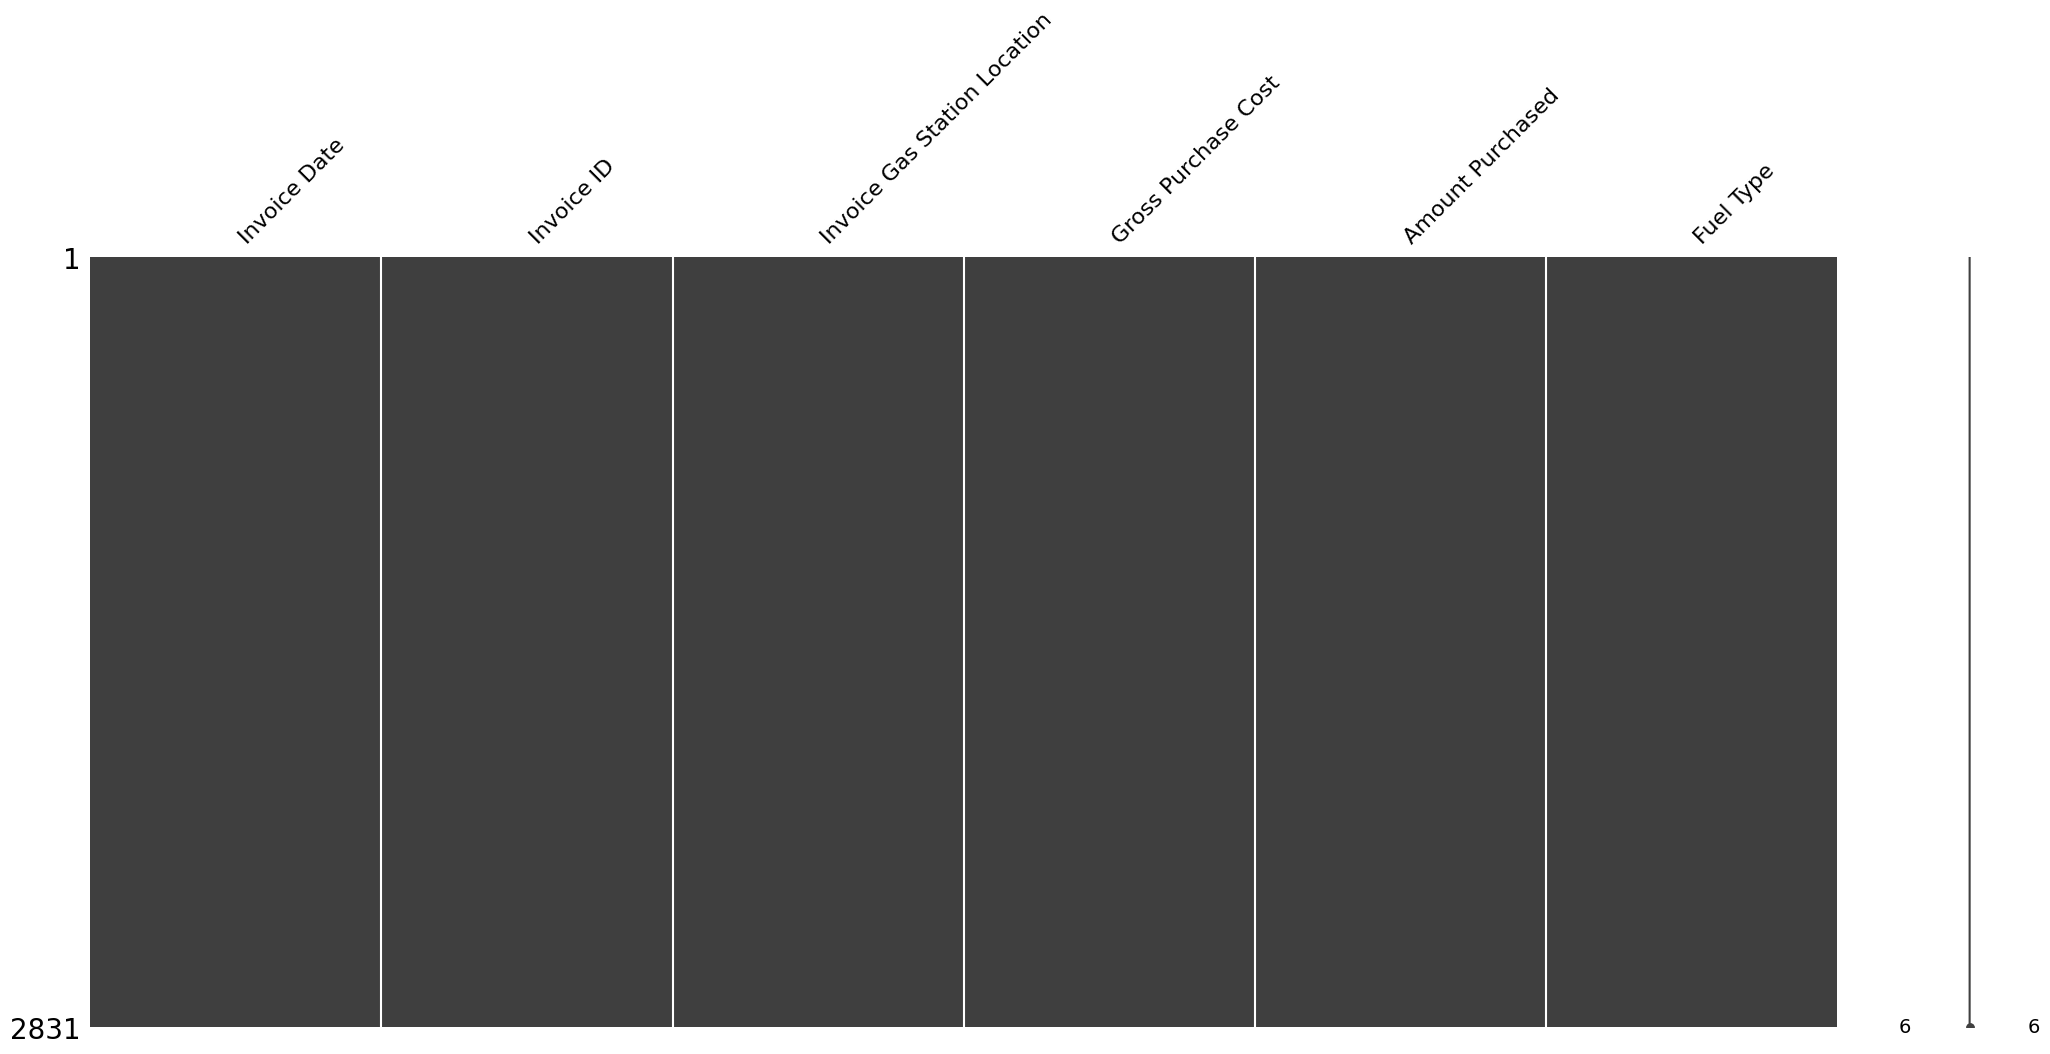

In [50]:
msno.matrix(invoices_data)

In [51]:
#Calculate which station creates the most orders
invoices_data['Invoice Gas Station Location'].value_counts()

Invoice Gas Station Location
1    1361
2     632
4     356
5     280
3      80
7      52
6      42
8      28
Name: count, dtype: int64

In [52]:
#Calculate the total amount of fuel purchased by each station
invoices_data.groupby('Invoice Gas Station Location')['Amount Purchased'].sum()

Invoice Gas Station Location
1    1.573867e+07
2    6.283414e+06
3    8.553338e+05
4    3.211086e+06
5    2.158447e+06
6    4.413100e+05
7    1.046451e+05
8    2.837933e+05
Name: Amount Purchased, dtype: float64

In [56]:
#fuel type that is purchased more by the gas stations
invoices_data.groupby('Fuel Type')['Amount Purchased'].sum()

Fuel Type
D    1.135114e+07
G    1.772556e+07
Name: Amount Purchased, dtype: float64

In [58]:
#Convert 'Invoice Date' into datetime
invoices_data['Invoice Date'] = pd.to_datetime(invoices_data['Invoice Date'])

C:\Users\mengn\AppData\Local\Temp\ipykernel_11424\2478927877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invoices_data['Invoice Date'] = pd.to_datetime(invoices_data['Invoice Date'])


In [60]:
#Add a column to extract the month of the order
invoices_data['Month'] = invoices_data['Invoice Date'].dt.month

#Group by 'Month' and calculate the total amount purchased for each month
monthly_purchase = invoices_data.groupby('Month')['Amount Purchased'].sum().reset_index()

#Sort by the 'Amount Purchased' to find the month with the highest purchase
max_purchase_month = monthly_purchase.sort_values(by='Amount Purchased', ascending=False)

C:\Users\mengn\AppData\Local\Temp\ipykernel_11424\2555349331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invoices_data['Month'] = invoices_data['Invoice Date'].dt.month


In [62]:
max_purchase_month

,Month,Amount Purchased
0,1,3026439.408
6,7,2947955.056
1,2,2623530.336
4,5,2600150.416
5,6,2584959.696
7,8,2503506.672
2,3,2458714.176
3,4,2285426.352
9,10,2226737.536
8,9,2206215.392


In [64]:
def calculate_discount(Amount_Purchased):
    """
    Purchase quantity (liters)	Discount per liter
    0-15000	    0
    15000-25000	2 cents
    25000-40000	3 center
    40000+	    4 cents
    
    """
    if Amount_Purchased<=15000:
        discount = 0
    elif 15000<Amount_Purchased<=25000:
        discount = Amount_Purchased*0.02
    elif 25000<Amount_Purchased<=40000:
        discount = Amount_Purchased*0.03
    else:
        discount = Amount_Purchased*0.04

    return discount

invoices_data['discount'] = invoices_data['Amount Purchased'].apply(calculate_discount)

C:\Users\mengn\AppData\Local\Temp\ipykernel_11424\2821670067.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invoices_data['discount'] = invoices_data['Amount Purchased'].apply(calculate_discount)


In [66]:
invoices_data

,Invoice Date,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Fuel Type,Month,discount
0,2017-01-02,10000.0,1,7570.82000,6609.600,G,1,0.0
1,2017-01-02,10001.0,1,12491.85300,9338.736,D,1,0.0
3,2017-01-02,10002.0,2,17034.34500,13377.824,D,1,0.0
5,2017-01-02,10003.0,2,12616.77153,9432.112,D,1,0.0
6,2017-01-02,10004.0,4,11363.80082,9139.200,D,1,0.0
...,...,...,...,...,...,...,...,...
2868,2019-08-14,12826.0,2,14418.62669,8182.960,D,8,0.0
2869,2019-08-14,12827.0,2,7570.82000,4296.640,D,8,0.0
2870,2019-08-14,12828.0,4,8706.44300,6352.416,G,8,0.0
2871,2019-08-14,12829.0,4,13252.72041,7521.264,D,8,0.0


In [68]:
#The total discount amount for each gas station
invoices_data.groupby('Invoice Gas Station Location')['discount'].sum()

Invoice Gas Station Location
1    190587.37552
2     10296.32160
3      1955.05056
4       343.36672
5         0.00000
6      1461.89504
7         0.00000
8      1335.39648
Name: discount, dtype: float64

In [70]:
#Tanks
def max_discount(capacity):
    """
    Purchase quantity (liters)	Discount per liter
    0-15000	    0
    15000-25000	2 cents
    25000-40000	3 center
    40000+	    4 cents
    
    """
    if capacity<=15000:
        discount = 0
    elif 15000<capacity<=25000:
        discount = 0.02
    elif 25000<capacity<=40000:
        discount = 0.03
    else:
        discount = 0.04

    return discount

tanks['max_possible_discount_per_liter'] = tanks['Tank Capacity'].apply(max_discount)

In [72]:
tanks

,Tank ID,Tank Location,Tank Number,Tank Type,Tank Capacity,max_possible_discount_per_liter
0,T 10,1,1,U,40000,0.03
1,T 11,1,2,U,40000,0.03
2,T 12,1,3,D,40000,0.03
3,T 13,1,4,P,40000,0.03
4,T 14,1,5,U,40000,0.03
5,T 15,1,6,D,40000,0.03
6,T 16,2,1,U,70000,0.04
7,T 17,2,2,D,40000,0.03
8,T 18,2,3,U,40000,0.03
9,T 19,2,4,D,70000,0.04


In [74]:
#Max possible discount per liter by tank type in each tank location
tanks.groupby(['Tank Location','Tank Type'])['max_possible_discount_per_liter'].max()

Tank Location  Tank Type
1              D            0.03
               P            0.03
               U            0.03
2              D            0.04
               U            0.04
3              D            0.03
               U            0.03
4              D            0.03
               U            0.03
5              D            0.02
               U            0.02
6              D            0.03
               U            0.03
7              D            0.00
               U            0.00
8              D            0.03
               U            0.03
Name: max_possible_discount_per_liter, dtype: float64

In [92]:
gas_station.head()

,Tank ID,Tank Location,Tank Number,Tank Type,Tank Capacity,Gas Station Location,Gas Station Name,Gas Station Address,Gas Station Latitude,Gas Station Longitude,Invoice Date,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Fuel Type,Discount_per_Liter,Potential_Savings
0,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/2/2017,10000.0,1,7570.82000,6609.600,G,0.00,0.0000
1,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/2/2017,10001.0,1,12491.85300,9338.736,D,0.00,0.0000
3,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/3/2017,10006.0,1,5670.54418,4239.216,D,0.00,0.0000
4,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/3/2017,10007.0,1,7627.60115,6659.184,G,0.00,0.0000
5,T 10,1,1,U,40000,1,EastMount,"386 Upper Gage Ave, Hamilton, ON L8V 4H9, Canada",43.23467,-79.83651,1/3/2017,10008.0,1,32175.98500,26704.960,G,0.03,801.1488


In [97]:
invoices_data

,Invoice Date,Invoice ID,Invoice Gas Station Location,Gross Purchase Cost,Amount Purchased,Fuel Type,Month,discount
0,2017-01-02,10000.0,1,7570.82000,6609.600,G,1,0.0
1,2017-01-02,10001.0,1,12491.85300,9338.736,D,1,0.0
3,2017-01-02,10002.0,2,17034.34500,13377.824,D,1,0.0
5,2017-01-02,10003.0,2,12616.77153,9432.112,D,1,0.0
6,2017-01-02,10004.0,4,11363.80082,9139.200,D,1,0.0
...,...,...,...,...,...,...,...,...
2868,2019-08-14,12826.0,2,14418.62669,8182.960,D,8,0.0
2869,2019-08-14,12827.0,2,7570.82000,4296.640,D,8,0.0
2870,2019-08-14,12828.0,4,8706.44300,6352.416,G,8,0.0
2871,2019-08-14,12829.0,4,13252.72041,7521.264,D,8,0.0


In [101]:
daily_consumption

,Invoice Gas Station Location,Fuel Type,Total_Consumption,Avg_Daily_Consumption,7_Day_Threshold
0,1,D,4.872458e+06,162415.267733,1.136907e+06
1,1,G,1.086621e+07,362207.040533,2.535449e+06
2,2,D,3.460900e+06,115363.326933,8.075433e+05
3,2,G,2.822514e+06,94083.792533,6.585865e+05
4,3,D,4.318151e+05,14393.837333,1.007569e+05
5,3,G,4.235187e+05,14117.288533,9.882102e+04
6,4,D,1.632468e+06,54415.614400,3.809093e+05
7,4,G,1.578618e+06,52620.592533,3.683441e+05
8,5,D,8.117340e+05,27057.798400,1.894046e+05
9,5,G,1.346713e+06,44890.427200,3.142330e+05


In [103]:
# Calculate daily consumption for each location and tank type
# Group by Gas Station Location and Fuel Type to calculate average daily consumption
daily_consumption = (
    invoices_data.groupby(['Invoice Gas Station Location', 'Fuel Type'])
    .agg({'Amount Purchased': 'sum'})
    .rename(columns={'Amount Purchased': 'Total_Consumption'})
    .reset_index()
)
daily_consumption['Avg_Daily_Consumption'] = daily_consumption['Total_Consumption'] / 30  # Assuming a 30-day month

# Calculate the 7-day inventory threshold
daily_consumption['7_Day_Threshold'] = daily_consumption['Avg_Daily_Consumption'] * 7
daily_consumption['7_Day_Threshold']

0     1.136907e+06
1     2.535449e+06
2     8.075433e+05
3     6.585865e+05
4     1.007569e+05
5     9.882102e+04
6     3.809093e+05
7     3.683441e+05
8     1.894046e+05
9     3.142330e+05
10    1.274699e+04
11    9.022536e+04
12    2.585863e+03
13    2.183132e+04
14    1.774519e+04
15    4.847325e+04
Name: 7_Day_Threshold, dtype: float64

In [116]:
# Analyze invoices for potential savings with tiered discounts
def calculate_discount(amount):
    if amount < 15000:
        return 0
    elif amount <= 25000:
        return 0.02  # 2 cents per liter
    elif amount <= 40000:
        return 0.03  # 3 cents per liter
    else:
        return 0.04  # 4 cents per liter

invoices_data['Discount_per_Liter'] = invoices_data['Amount Purchased'].apply(calculate_discount)
invoices_data['Potential_Savings'] = invoices_data['Amount Purchased'] * invoices_data['Discount_per_Liter']

C:\Users\mengn\AppData\Local\Temp\ipykernel_11424\3448126114.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invoices_data['Discount_per_Liter'] = invoices_data['Amount Purchased'].apply(calculate_discount)
C:\Users\mengn\AppData\Local\Temp\ipykernel_11424\3448126114.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invoices_data['Potential_Savings'] = invoices_data['Amount Purchased'] * invoices_data['Discount_per_Liter']


In [118]:
# Aggregate potential savings and costs
invoice_summary = (
    invoices_data.groupby(['Invoice Gas Station Location', 'Fuel Type'])
    .agg({
        'Gross Purchase Cost': 'sum',
        'Amount Purchased': 'sum',
        'Potential_Savings': 'sum'
    })
    .reset_index()
)

In [109]:
display(invoice_summary)

,Gas Station Location,Fuel Type,Gross Purchase Cost,Amount Purchased,Potential_Savings
0,1,D,3.537936e+07,2.923475e+07,1.408624e+04
1,1,G,7.381436e+07,6.519727e+07,1.129438e+06
2,2,D,1.606219e+07,1.384360e+07,2.704555e+04
3,2,G,1.216001e+07,1.129006e+07,1.413974e+04
4,3,D,9.859555e+05,8.636302e+05,6.388794e+02
5,3,G,8.946589e+05,8.470373e+05,3.271222e+03
6,4,D,3.935123e+06,3.264937e+06,6.867334e+02
7,4,G,3.461545e+06,3.157236e+06,0.000000e+00
8,5,D,1.989362e+06,1.623468e+06,0.000000e+00
9,5,G,2.975378e+06,2.693426e+06,0.000000e+00
